In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [2]:
inventory = pd.read_csv(r'C:\Users\Sruja\Documents\MS-DS-COURSES\Info 5082\Mexico toy store\inventory.csv')
products = pd.read_csv(r'C:\Users\Sruja\Documents\MS-DS-COURSES\Info 5082\Mexico toy store\products.csv')
sales = pd.read_csv(r'C:\Users\Sruja\Documents\MS-DS-COURSES\Info 5082\Mexico toy store\sales.csv')
stores = pd.read_csv(r'C:\Users\Sruja\Documents\MS-DS-COURSES\Info 5082\Mexico toy store\stores.csv')

In [3]:
sales1 = pd.merge(sales, products, on='Product_ID')
sales2 = pd.merge(sales1, stores, on='Store_ID')


sales2['sales'] = sales2['Units'] * sales2['Product_Price']
sales2['cost'] = sales2['Units'] * sales2['Product_Cost']



##Changing the data column into date format
sales2['Date'] = pd.to_datetime(sales2['Date'])
sales2.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,sales,cost
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99
1,66,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99
2,98,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99
3,128,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99
4,146,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99


In [30]:
Weekly_sales = sales2.groupby([sales2['Date'].dt.year.rename('year'), sales2['Date'].dt.to_period("W").rename('week')])['sales'].sum().reset_index()


Weekly_sales = Weekly_sales.merge(sales2.groupby([sales2['Date'].dt.year.rename('year'), sales2['Date'].dt.to_period("W").rename('week')])['Units'].sum().reset_index())


In [31]:
Weekly_sales

,year,week,sales,Units
0,2017,2016-12-26/2017-01-01,21076.15,1485
1,2017,2017-01-02/2017-01-08,135981.89,9411
2,2017,2017-01-09/2017-01-15,113695.84,8116
3,2017,2017-01-16/2017-01-22,117026.21,7979
4,2017,2017-01-23/2017-01-29,122800.86,8814
...,...,...,...,...
87,2018,2018-08-27/2018-09-02,158948.70,12030
88,2018,2018-09-03/2018-09-09,137531.63,10737
89,2018,2018-09-10/2018-09-16,145747.55,11645
90,2018,2018-09-17/2018-09-23,151098.96,12104


In [23]:

Weekly_sales.reset_index("week", inplace = True)


In [59]:
weekly_df =  Weekly_sales.drop(['year','Units'], axis=1)

In [60]:
weekly_df

,week,sales
0,2016-12-26/2017-01-01,21076.15
1,2017-01-02/2017-01-08,135981.89
2,2017-01-09/2017-01-15,113695.84
3,2017-01-16/2017-01-22,117026.21
4,2017-01-23/2017-01-29,122800.86
...,...,...
87,2018-08-27/2018-09-02,158948.70
88,2018-09-03/2018-09-09,137531.63
89,2018-09-10/2018-09-16,145747.55
90,2018-09-17/2018-09-23,151098.96


In [68]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(weekly_df.sales)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.283518
p-value: 0.177339


In [64]:
weekly_df.describe()

,sales
count,92.000000
mean,157006.221196
std,31657.127497
min,21076.150000
25%,137515.087500
50%,155364.875000
75%,180205.112500
max,239512.340000


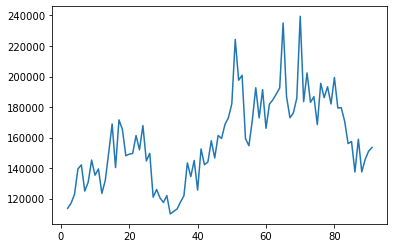

In [53]:
plt.plot(model.sales)

{'whiskers': [<matplotlib.lines.Line2D at 0x2bf800c3f70>,
 'caps': [<matplotlib.lines.Line2D at 0x2bf800d5670>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bf800c3c10>],
 'medians': [<matplotlib.lines.Line2D at 0x2bf800d5d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bf800df070>],
 'means': []}

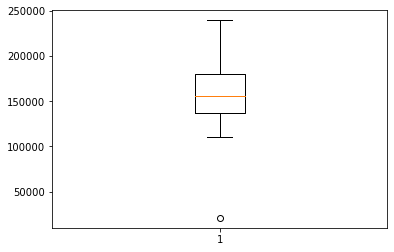

In [41]:
plt.boxplot(model.sales)

In [42]:
model.describe()

,sales
count,92.000000
mean,157006.221196
std,31657.127497
min,21076.150000
25%,137515.087500
50%,155364.875000
75%,180205.112500
max,239512.340000


In [66]:
 weekly_df.drop(index=weekly_df.index[:1], 
        axis=0, 
        inplace=True)

In [67]:
weekly_df

,week,sales
1,2017-01-02/2017-01-08,135981.89
2,2017-01-09/2017-01-15,113695.84
3,2017-01-16/2017-01-22,117026.21
4,2017-01-23/2017-01-29,122800.86
5,2017-01-30/2017-02-05,139484.02
...,...,...
87,2018-08-27/2018-09-02,158948.70
88,2018-09-03/2018-09-09,137531.63
89,2018-09-10/2018-09-16,145747.55
90,2018-09-17/2018-09-23,151098.96


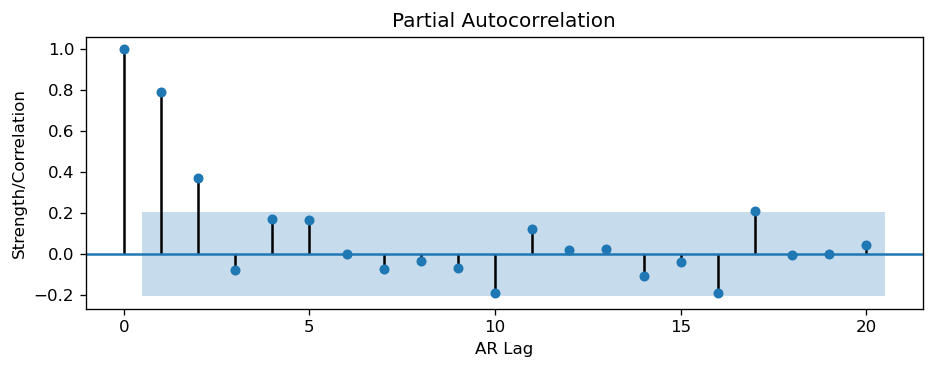

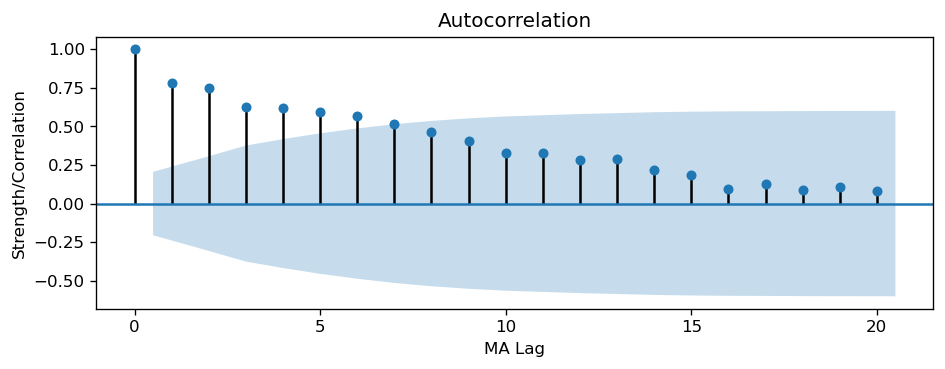

In [69]:
# PACF plot of 1st differenced series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})


# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(weekly_df.total_amt.diff()); axes[0].set_title('1st Differencing')
# # axes[1].set(ylim=(0,5))
plot_pacf(weekly_df.sales)
plt.xlabel('AR Lag')
plt.ylabel('Strength/Correlation')
plot_acf(weekly_df.sales)
plt.xlabel('MA Lag')
plt.ylabel('Strength/Correlation')


plt.show()

In [119]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(weekly_df.sales, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Sruja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Sruja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   90
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -998.905
Method:                       css-mle   S.D. of innovations          15952.324
Date:                Thu, 02 Dec 2021   AIC                           2011.810
Time:                        22:52:25   BIC                           2029.309
Sample:                             1   HQIC                          2018.867
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           249.5541    816.546      0.306      0.760   -1350.846    1849.954
ar.L1.D.sales    -0.4826      0.105     -4.580      0.000      -0.689      -0.276
ar.L2.D.sales    -0.1145      0.116     

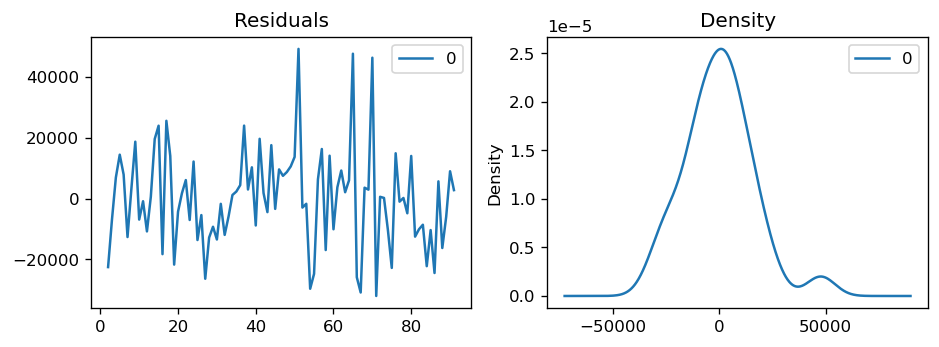

In [71]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

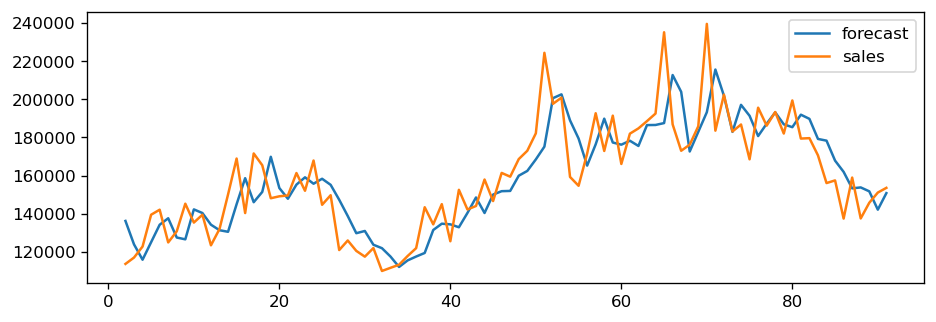

In [72]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [92]:
from statsmodels.tsa.stattools import acf

# Create Training and Testing set
X_train = weekly_df.sales[:65]
X_test = weekly_df.sales[65:]   



C:\Users\Sruja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Sruja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   64
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -706.718
Method:                       css-mle   S.D. of innovations          15074.520
Date:                Thu, 02 Dec 2021   AIC                           1427.436
Time:                        22:52:03   BIC                           1442.548
Sample:                             1   HQIC                          1433.389
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1331.6440   1025.146      1.299      0.194    -677.604    3340.892
ar.L1.D.sales    -0.3887      0.135     -2.880      0.004      -0.653      -0.124
ar.L2.D.sales    -0.0351      0.143     

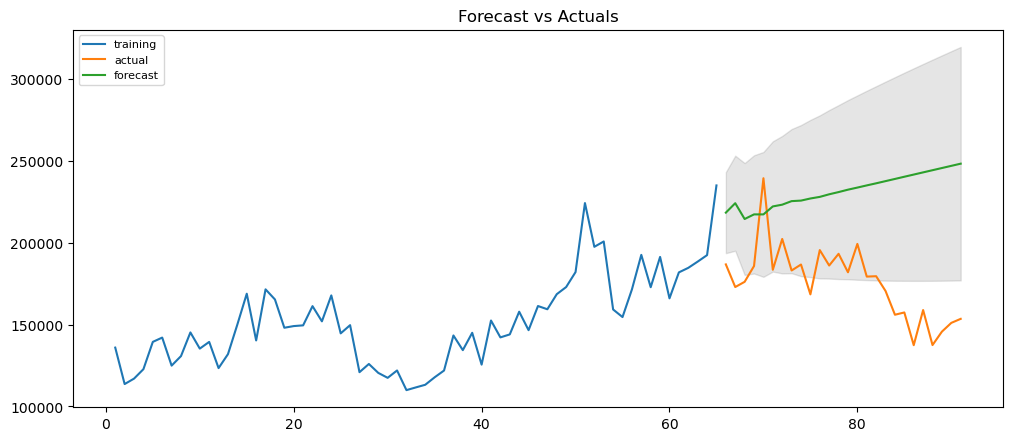

In [117]:
# Build Model

model = ARIMA(X_train, order=(5,1,0))  
fitted = model.fit(disp=-1) 
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(26, alpha=0.1)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=X_test.index)
lower_series = pd.Series(conf[:, 0], index=X_test.index)
upper_series = pd.Series(conf[:, 1], index=X_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(X_train, label='training')
plt.plot(X_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.1)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [112]:
############Calculating the MAPE of the model############
pd.DataFrame([fc_series,X_test])
dataset = pd.DataFrame({'test_set': X_test,'forecast': fc_series})
dataset['PE']=(abs(dataset['test_set']-dataset['forecast'])/dataset['test_set'])

In [118]:
print("The mean absolute % error is {}%".format(round(np.mean(np.abs(fc- X_test.values)/np.abs(X_test.values))*100,2)))
print("The mean % error is {}%".format(round(np.mean((fc- X_test.values)/(X_test.values))*100,2)))

The mean absolute % error is 35.3%
The mean % error is 34.59%


In [122]:
pip install pmdarima

  Using cached pmdarima-1.8.4-cp38-cp38-win_amd64.whl (600 kB)
Note: you may need to restart the kernel to use updated packages.


In [123]:
import pmdarima as pm

In [124]:
# Create Training and Testing set
X_train = weekly_df.sales[:65]
X_test = weekly_df.sales[65:]   


In [162]:
smodel = pm.auto_arima(weekly_df.sales, start_p=1,d=1,start_q=1,
                      max_p=5,max_q=5,max_d=5,m=21,
                        start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      seasonal=True,
                       trace=True,
                      error_action="ignore",
                      suppress_warnings=True,
                      stepwise=True,n_fits=50)
 

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[21]             : AIC=1599.723, Time=0.34 sec
 ARIMA(0,1,0)(0,1,0)[21]             : AIC=1608.640, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[21]             : AIC=1581.666, Time=0.50 sec
 ARIMA(0,1,1)(0,1,1)[21]             : AIC=1579.359, Time=0.68 sec
 ARIMA(0,1,1)(0,1,0)[21]             : AIC=1598.240, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[21]             : AIC=1580.868, Time=0.95 sec
 ARIMA(0,1,1)(0,1,2)[21]             : AIC=1580.775, Time=1.80 sec
 ARIMA(0,1,1)(1,1,0)[21]             : AIC=1583.080, Time=0.50 sec
 ARIMA(0,1,1)(1,1,2)[21]             : AIC=1582.755, Time=3.25 sec
 ARIMA(0,1,0)(0,1,1)[21]             : AIC=1608.241, Time=0.45 sec
 ARIMA(1,1,1)(0,1,1)[21]             : AIC=1573.090, Time=2.56 sec
 ARIMA(1,1,1)(1,1,1)[21]             : AIC=1581.427, Time=1.54 sec
 ARIMA(1,1,1)(0,1,2)[21]             : AIC=1581.336, Time=2.08 sec
 ARIMA(1,1,1)(1,1,0)[21]             : AIC=1583.852, Time=0.67 sec
 ARIMA(1,1,1)(1,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   91
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 21)   Log Likelihood                -782.545
Date:                            Fri, 03 Dec 2021   AIC                           1573.090
Time:                                    15:30:01   BIC                           1582.026
Sample:                                         0   HQIC                          1576.635
                                             - 91                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4174      0.328     -1.271      0.204      -1.061       0.226
ma.L1          0.0673      0.356      0.189      0.850      -0.631       0.765
ma.S.L21      -0.7846      0.184     -4.255      0.000      -1.146      -0.423
sigma2       3.69e+08   3.01e-10   1.23e+18      0.000    3.69e+08    3.69e+08
===================================================================================
Ljung-Box (Q):                       36.91   Jarque-Bera (JB):                 3.25
Prob(Q):                              0.61   Prob(JB):                         0.20
Heteroskedasticity (H):               1.52   Skew:                             0.33
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.31e+34. Standard errors may be unstable.
"""

In [163]:
import statsmodels.api as sm


# define model
model = sm.tsa.statespace.SARIMAX(endog=X_train, order=(5, 1, 0) ,seasonal_order=(0,1,1,21),enforce_stationarity=True,enforce_invertibility=True)


C:\Users\Sruja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Sruja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [164]:
res = model.fit(disp=False)
print(res.summary())

C:\Users\Sruja\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                                sales   No. Observations:                   65
Model:             SARIMAX(5, 1, 0)x(0, 1, [1], 21)   Log Likelihood                -484.138
Date:                              Fri, 03 Dec 2021   AIC                            982.275
Time:                                      15:30:40   BIC                            994.604
Sample:                                           0   HQIC                           986.822
                                               - 65                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3795      0.195     -1.944      0.052      -0.762       0.003
ar.L2          0.03

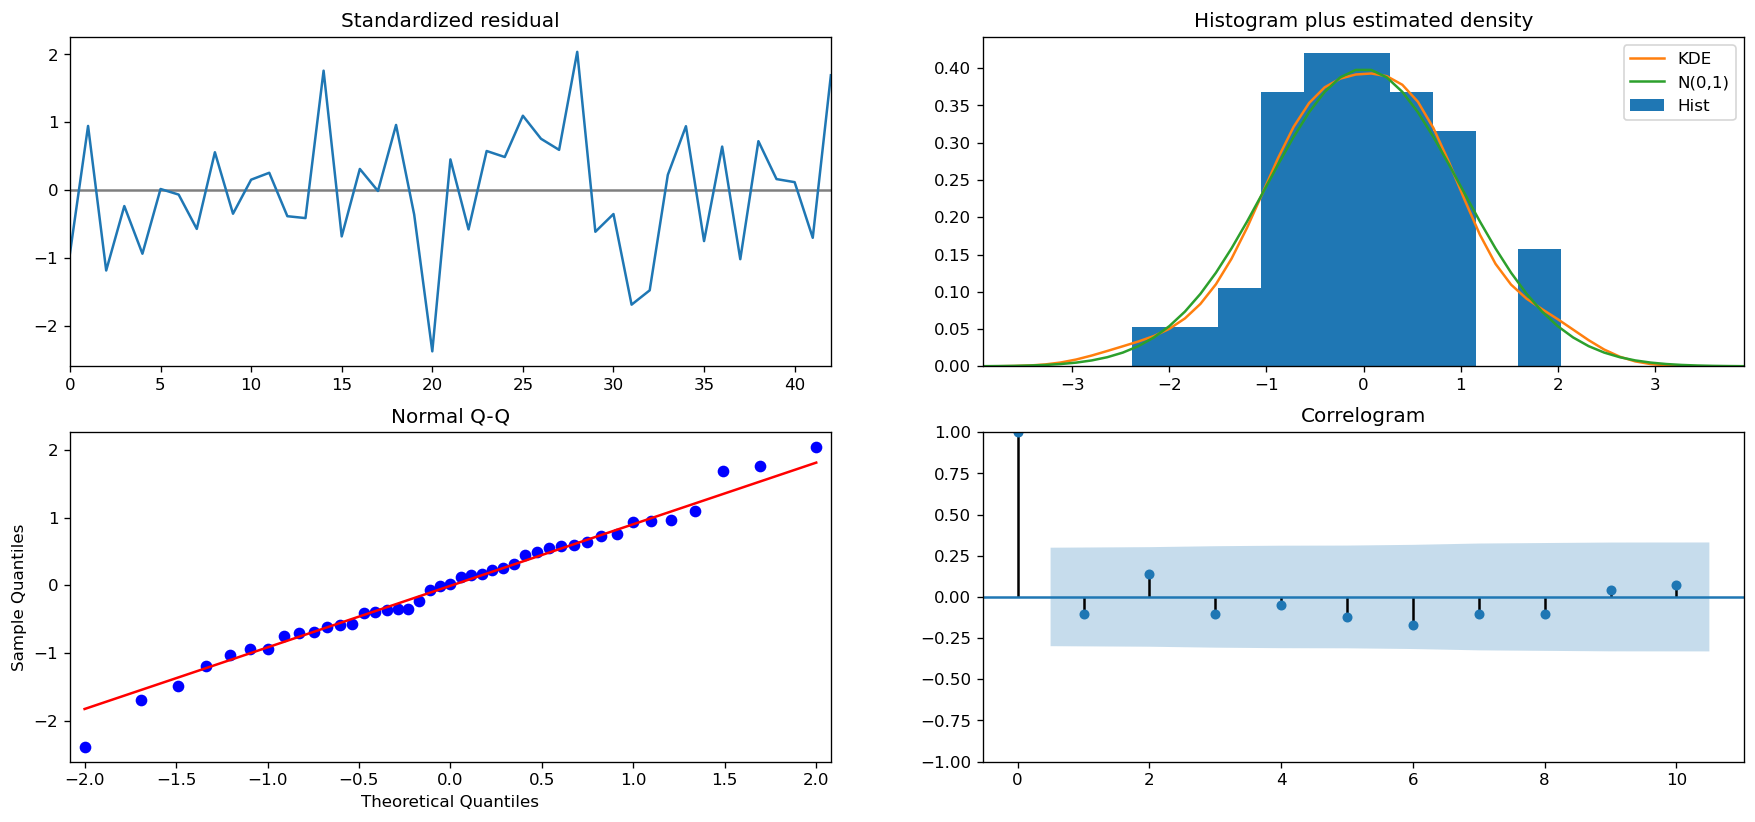

In [165]:
res.plot_diagnostics(figsize=(18, 8))
plt.show()

C:\Users\Sruja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


0.18773919215720528

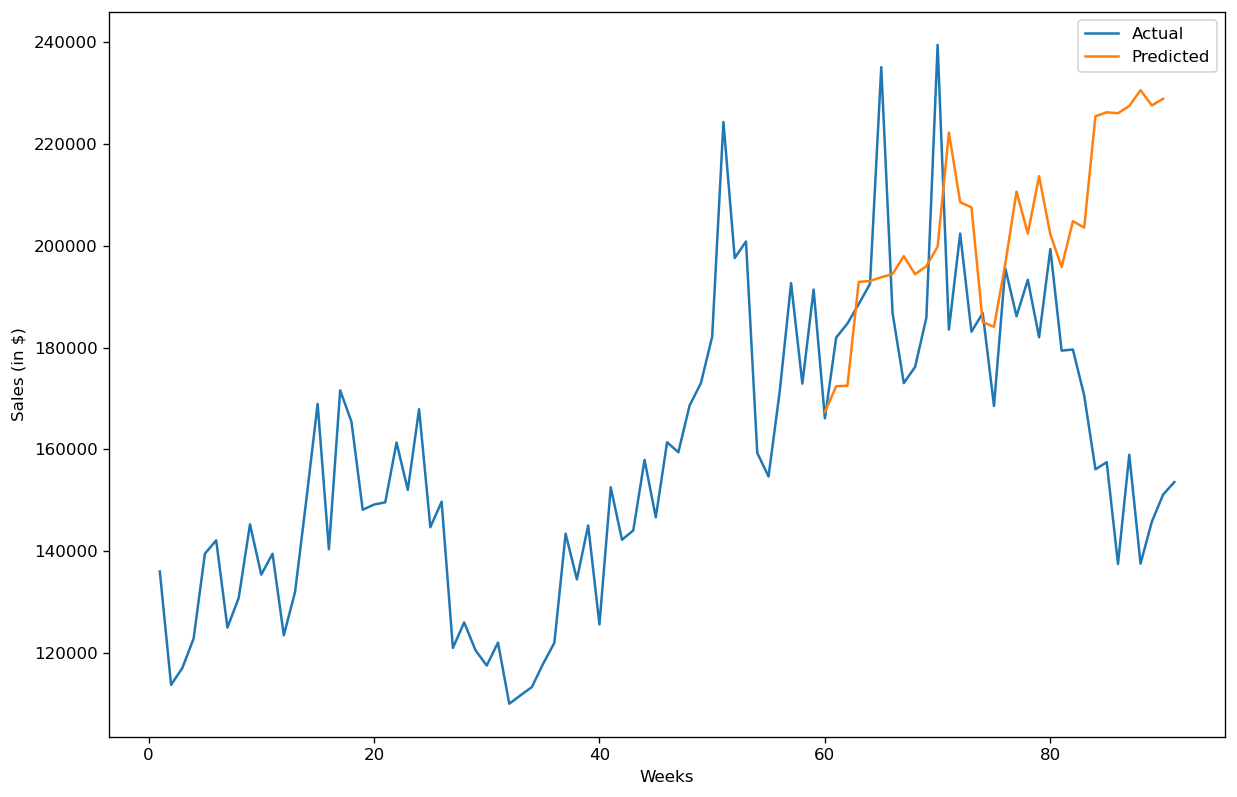

In [166]:
########Calculating the MAPE for single model run
X = res.predict(start = 60, end= 90, dynamic= True)
df = pd.DataFrame({'Actual': weekly_df.sales, 'Predicted': X})
df[['Actual', 'Predicted']].plot(figsize=(12, 8))
plt.xlabel('Weeks')
plt.ylabel('Sales (in $)')
np.mean(abs(df.dropna()['Actual']-df.dropna()['Predicted'])/df.dropna()['Actual'])